In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



Load dataset

In [55]:
df = pd.read_csv("adult.data", header=None, names=[
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Repalce ? with NaN

In [56]:
df = df.replace(" ?", np.nan)

Drop rows with missing values

In [57]:
df = df.dropna()


Encode categorical variables

In [58]:
df_encoded = pd.get_dummies(df, drop_first=True)


x and y targets

In [59]:
X = df_encoded.drop("income_ >50K", axis=1)
y = df_encoded["income_ >50K"]

Train/test split (70/30)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Age distributuion

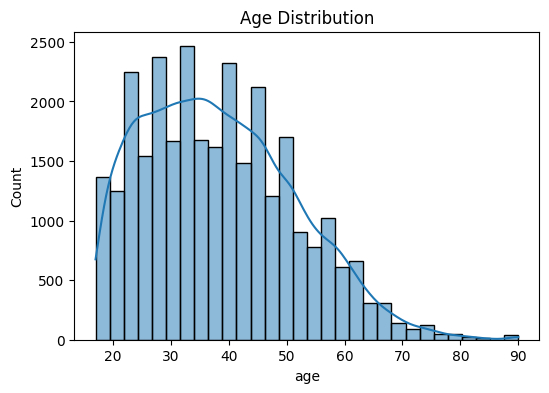

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Income by education

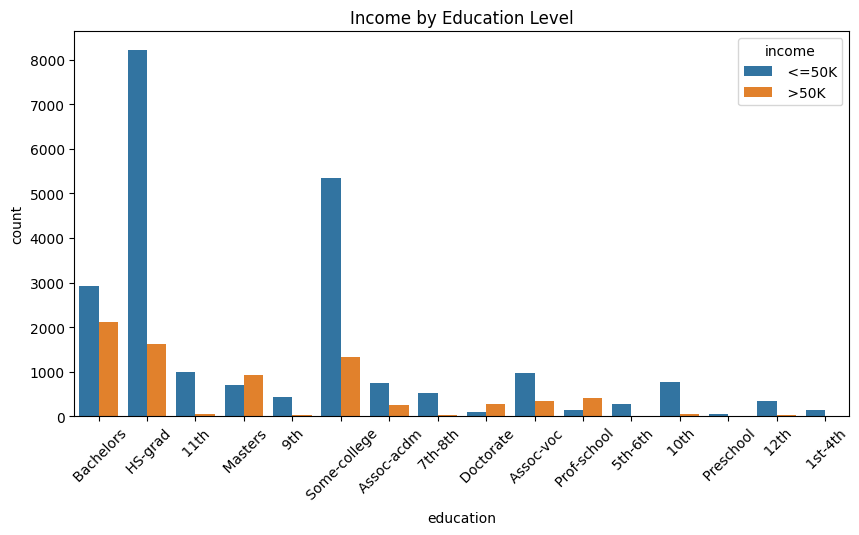

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="education", hue="income")
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()


Income by gender

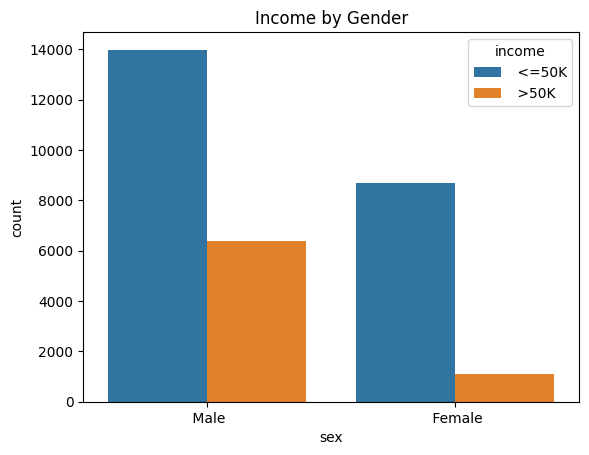

In [63]:
sns.countplot(data=df, x="sex", hue="income")
plt.title("Income by Gender")
plt.show()


Train decision tree

In [64]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Train Random forest

In [65]:
rf = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,        
    random_state=42,
    n_jobs=-1              
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Perdiction

In [66]:
y_pred = dt.predict(X_test)

y_pred_rf = rf.predict(X_test)


Decision Tree visualization

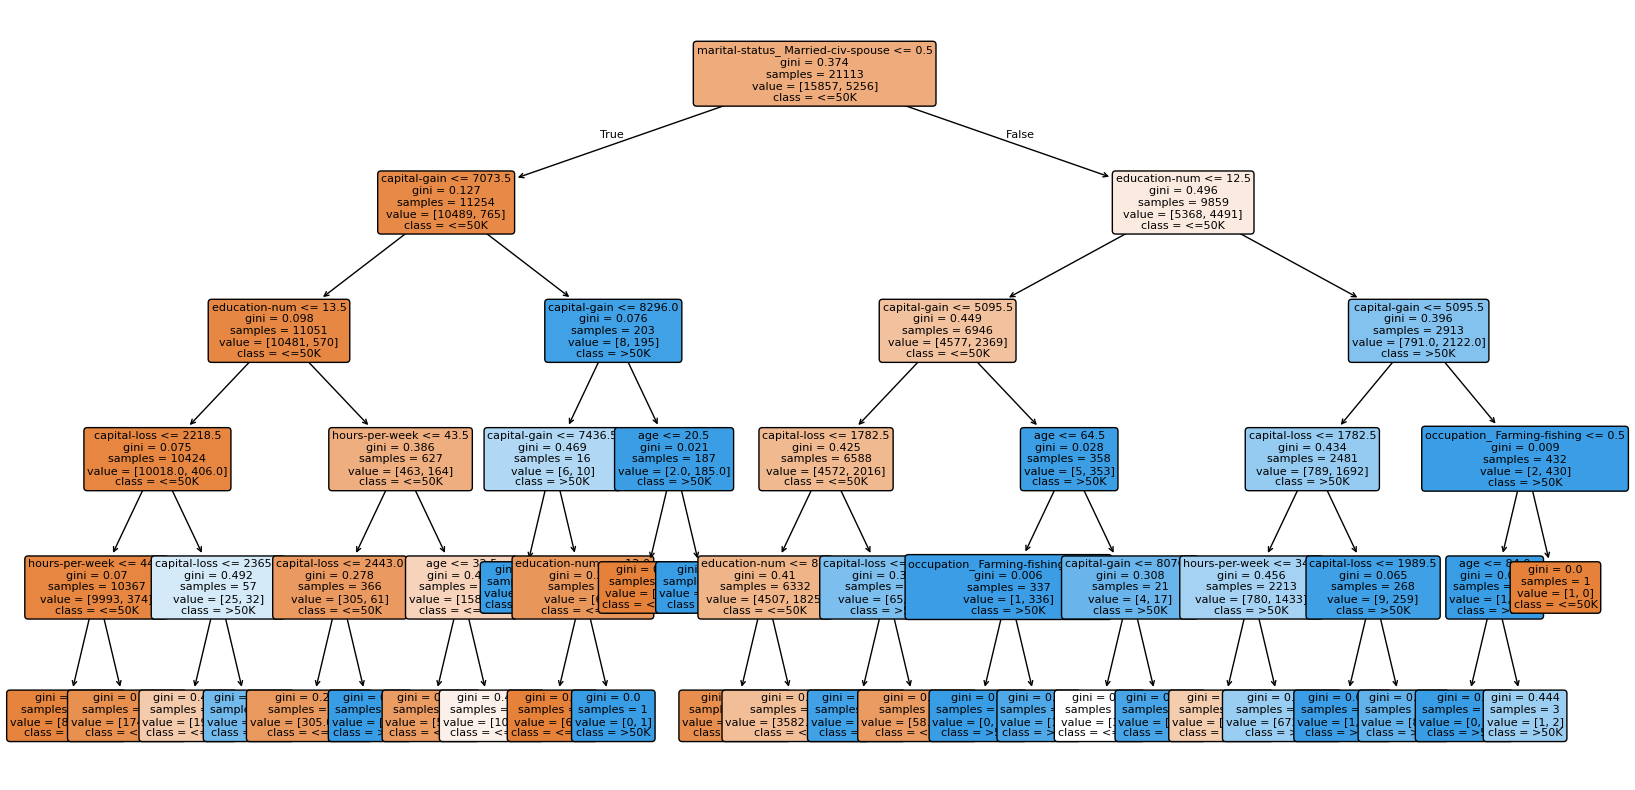

In [67]:
plt.figure(figsize=(20,10))  # make the plot big enough to read
plot_tree(
    dt, 
    feature_names=X.columns,
    class_names=["<=50K", ">50K"], 
    filled=True, 
    rounded=True,
    fontsize=8
)
plt.show()

Evaluation

Accuracy

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Accuracy: 0.8489335838214167
Random Forest Accuracy: 0.8497071499613217


Classification report

In [69]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.95      0.90      6797
        True       0.79      0.53      0.64      2252

    accuracy                           0.85      9049
   macro avg       0.83      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049


Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90      6797
        True       0.73      0.63      0.68      2252

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.84      0.85      0.85      9049



Confusion matrix

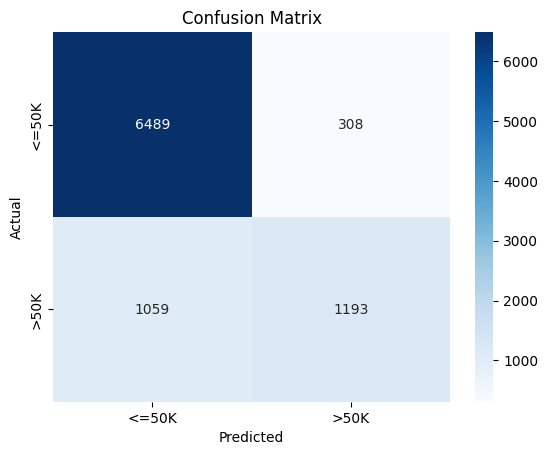

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Feature importance

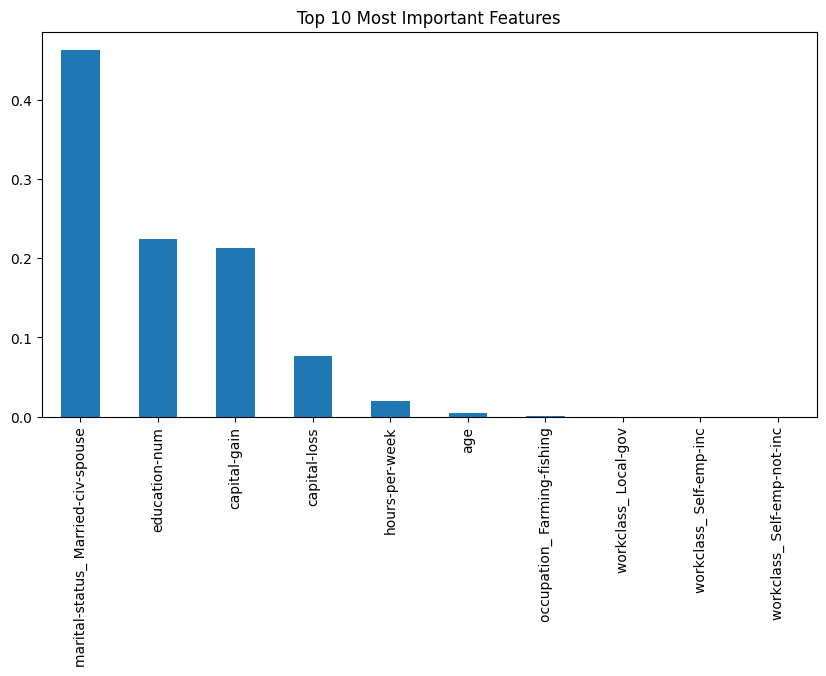

In [71]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Most Important Features")
plt.show()

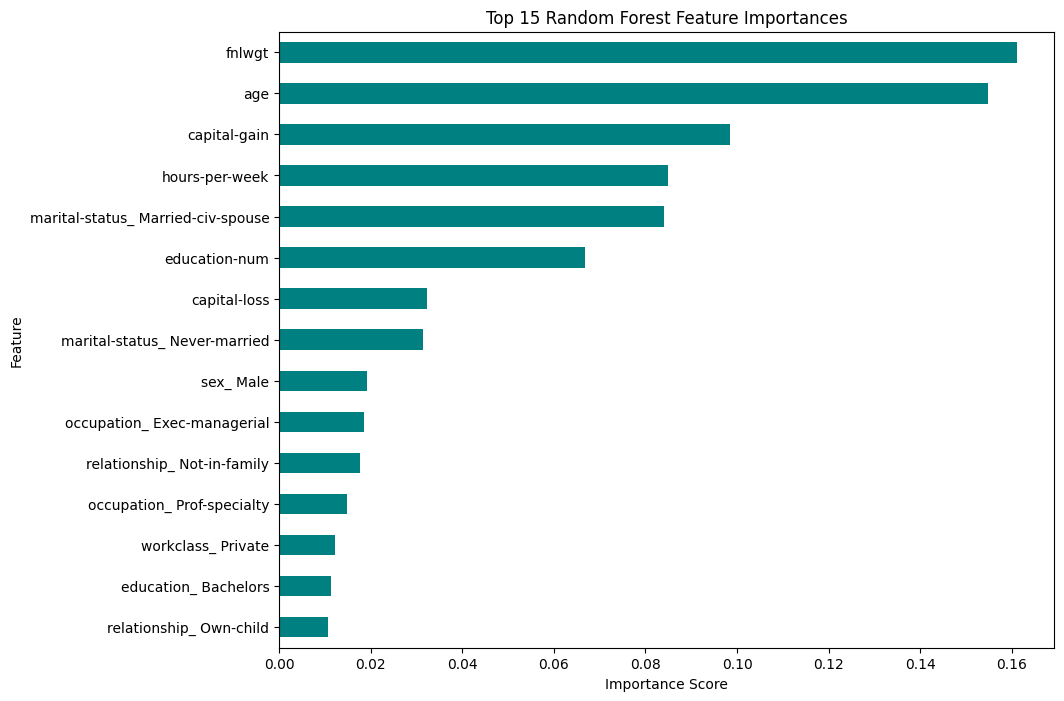

In [72]:
# Sorted feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Horizontal barplot
plt.figure(figsize=(10,8))
importances.tail(15).plot(kind="barh", color="teal")  # show top 15
plt.title("Top 15 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
